In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/chatgpt11.csv')


In [ ]:
tweets = df['Text']
user_ids = df['Username']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweets, user_ids, test_size=0.2, random_state=42)


In [ ]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# Train the classifier (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_vec, y_train)



In [ ]:
# Train the classifier (Random Forest)
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)

# Evaluate the classifier on the testing set and print the classification report


In [ ]:
knn_predictions = knn.predict(X_test_vec)
print("K-Nearest Neighbors:")
print(classification_report(y_test, knn_predictions))



In [ ]:
rf_predictions = rf.predict(X_test_vec)
print("Random Forest:")
print(classification_report(y_test, rf_predictions))

**Question NO 2 **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/chatgpt11.csv')

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:


# Preprocess the tweets
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['Text'].apply(preprocess_text)


tweets = df['processed_text']
user_ids = df['Username']


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

df['processed_text'] = df['Text'].apply(preprocess_text)

LookupError: ignored

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_text'])

In [ ]:
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [ ]:
df['cluster_label'] = kmeans.labels_

In [ ]:
for cluster in range(k):
    cluster_tweets = df[df['cluster_label'] == cluster]['text']
    print(f'Cluster {cluster + 1}:')
    for tweet in cluster_tweets:
        print(tweet)
    print('---')


**Question NO 3**

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Load the dataset
data = pd.read_csv('/content/chatgpt11.csv')

# Preprocess the tweets
stop_words1 = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Load the dataset
data = pd.read_csv('/content/chatgpt11.csv')

# Preprocess the tweets
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['processed_text'] = data['Text'].apply(preprocess_text)

# Split the dataset into features (tweets) and target variable (user IDs)



In [ ]:
from sklearn.decomposition import PCA

# Split the dataset into features (tweets) and target variable (user IDs)
tweets = data['processed_text']
user_ids = data['Username']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tweets, user_ids, test_size=0.2, random_state=42)

# Convert the tweet text into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)



In [ ]:
# Apply dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)  # Adjust the number of components as per your requirement
X_train_vec_pca = pca.fit_transform(X_train_vec.toarray())
X_test_vec_pca = pca.transform(X_test_vec.toarray())

In [ ]:

# Train the classifier (KNN)
k_values = range(1, 21)  # Test K values from 1 to 20
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_vec_pca, y_train)
    knn_predictions = knn.predict(X_test_vec_pca)
    accuracy = accuracy_score(y_test, knn_predictions)
    accuracy_scores.append(accuracy)

# Create scatter plot for accuracy
plt.figure(figsize=(10, 6))
plt.scatter(k_values, accuracy_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. K Value for KNN (with PCA)')
plt.show()

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Elbow Curve for KNN (with PCA)')
plt.xticks(k_values)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


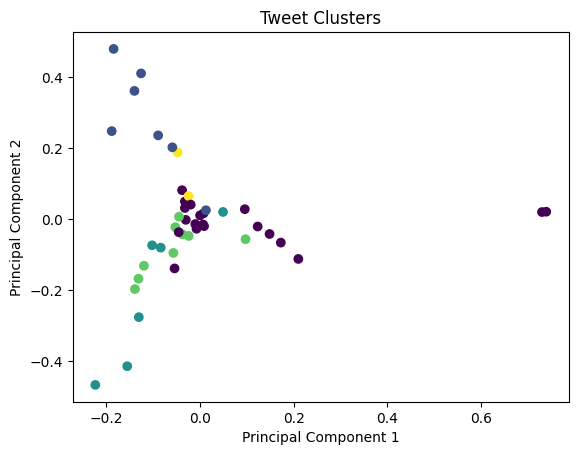

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('/content/chatgpt11.csv')
# Preprocess the data
# Assume `df` is the DataFrame containing the tweet data with relevant columns

# Remove duplicates
df.drop_duplicates(subset='Text', inplace=True)
df.dropna(inplace=True)

# Define the feature set
features = df['Text']  # You can change this to other features like hashtags if desired

# Vectorize the feature data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(features)

# Apply k-means clustering
num_clusters = 5  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
# Perform dimensionality reduction for visualization (e.g., using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Tweet Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

"*Hashtag Analysis*"